In [ ]:
# best 3 solutions based on EXP1 in turns of f1 micro is:
# XGBcls: RoadNet+Social type, 0.6561797753
# BAGcls: RoadNet+Social type, 0.6539325843
# RFreg: RoadNet+Social total, 0.6494382022
# with ~2014, min-max, no feature selection

In [1]:
from src.experiment_based_function import SEEDS
import pandas as pd
%matplotlib inline
import os
import glob

In [2]:
def get_exp5_result(eval_or_grid='eval'):
    res = []
    for directoy in glob.glob('experiment_1001/exp5_recon/*'):
#         print(directoy)
        df = pd.read_csv('%s/%s_res.csv' % (directoy, eval_or_grid), index_col=0)
        frac, sample_seed = directoy.replace('experiment_1001/exp5_recon/', '').split('#')
        df['frac'] = frac
        df['sample_seed'] = sample_seed
        res.append(df)
    return pd.concat(res, ignore_index=0)

In [45]:
eval_res = get_exp5_result()
eval_res = eval_res[eval_res.model_name!='GBDcls']

In [46]:
cols = ['frac', 'sample_seed', 'upsample', 'ftr_combo_name', 'model_name', 'feature_selection','test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [47]:
eval_res.columns

Index(['#ftr_all', '#ftr_keep', '#test_sample', '#train_sample',
       'feature_selection', 'ftr_combo_name', 'model_name', 'test_acc',
       'test_f1_macro', 'test_f1_micro', 'test_f1_weighted', 'test_mse',
       'test_n_classes', 'train_acc', 'train_f1_macro', 'train_f1_micro',
       'train_f1_weighted', 'train_mse', 'train_n_classes', 'upsample',
       'y_dist', 'y_dist_up', 'frac', 'sample_seed'],
      dtype='object')

In [48]:
print('train', eval_res.train_n_classes.value_counts().to_dict())
print('test', eval_res.test_n_classes.value_counts().to_dict())

print('train', 'test')
print(eval_res.apply(lambda x: (x.train_n_classes, x.test_n_classes), axis=1).value_counts())

train {5: 640}
test {5: 640}
train test
(5, 5)    640
dtype: int64


In [49]:
f1_choices = ['test_f1_macro', 'test_f1_micro']

In [50]:
keys = ['frac', 'ftr_combo_name', 'model_name']

In [51]:
info = eval_res.groupby(['frac','upsample']).mean()[['#test_sample', '#train_sample','test_n_classes','train_n_classes', ]]

In [52]:
means = eval_res.groupby(keys).mean()[f1_choices]
stds = eval_res.groupby(keys).std()[f1_choices]
means = means.reset_index().merge(info.reset_index(), how='left').set_index(keys)

In [53]:
def get_paper_table(means, f1_type, index_cols, column_col='ftr_combo_name'):
    cols_name_convert = {'RoadNet': '1RoadNet', 'RoadNet+Segment_NO_TOTAL_~2014': '5RoadNet+Segment type',
     'RoadNet+Segment_TOTAL_~2014': '4RoadNet+Segment total', 'Segment_NO_TOTAL_~2014': '3Segment type',
     'Segment_TOTAL_~2014': '2Segment total'}
    means_for_pivot = means.reset_index()
    means_for_pivot['ftr_combo_name'] = means_for_pivot['ftr_combo_name'].apply(lambda x: cols_name_convert[x])
    means_for_pivot['key'] = means_for_pivot.apply(lambda x: tuple([x[col] for col in index_cols]), axis=1)
    table = means_for_pivot.reset_index().pivot(index='key', columns=column_col, values=f1_type)
    table.index = pd.MultiIndex.from_tuples(table.index, names=index_cols)    
    return table

In [55]:
f1_type = f1_choices[1]
print(f1_type)
index_cols = [k for k in keys if k!='frac']
# ['test_n_classes','train_n_classes']+
table = get_paper_table(means, f1_type, index_cols, column_col='frac')

test_f1_micro


In [40]:
%matplotlib inline

In [56]:
table[table['90']>0.9]
table

frac                                     10        20        30        40  \
ftr_combo_name         model_name                                           
1RoadNet               BAGcls      0.519457  0.552036  0.605769  0.663650   
                       GDBcls      0.526471  0.566063  0.630090  0.633484   
                       RFreg       0.556561  0.597738  0.634615  0.677979   
                       XGBcls      0.508371  0.550679  0.609163  0.650830   
2Segment total         BAGcls      0.492760  0.536652  0.603507  0.658371   
                       GDBcls      0.497964  0.547511  0.592760  0.607843   
                       RFreg       0.542308  0.577828  0.620475  0.665158   
                       XGBcls      0.499548  0.537104  0.603507  0.610106   
3Segment type          BAGcls      0.509729  0.560181  0.618778  0.665913   
                       GDBcls      0.526018  0.578281  0.619344  0.668175   
                       RFreg       0.544796  0.589140  0.635747  0.684012   
                       XGBcls      0.517195  0.558824  0.610860  0.666667   
4RoadNet+Segment total BAGcls      0.539819  0.558371  0.622738  0.655354   
                       GDBcls      0.546154  0.589593  0.639706  0.674208   
                       RFreg       0.570814  0.602262  0.641403  0.673454   
                       XGBcls      0.522172  0.558824  0.625566  0.647813   
5RoadNet+Segment type  BAGcls      0.525566  0.583258  0.625566  0.671192   
                       GDBcls      0.542308  0.571493  0.648756  0.684766   
                       RFreg       0.553394  0.596380  0.638009  0.681750   
                       XGBcls      0.521267  0.569231  0.616516  0.673454   

frac                                     50        60        70        80  \
ftr_combo_name         model_name                                           
1RoadNet               BAGcls      0.717195  0.757919  0.819005  0.875566   
                       GDBcls      0.693439  0.696833  0.707014  0.720588   
                       RFreg       0.727376  0.730769  0.747738  0.813348   
                       XGBcls      0.696833  0.726244  0.771493  0.745475   
2Segment total         BAGcls      0.714932  0.757919  0.822398  0.864253   
                       GDBcls      0.709276  0.763575  0.822398  0.704751   
                       RFreg       0.702489  0.733032  0.757919  0.787330   
                       XGBcls      0.687783  0.763575  0.708145  0.713801   
3Segment type          BAGcls      0.705882  0.765837  0.826923  0.876697   
                       GDBcls      0.718326  0.764706  0.826923  0.877828   
                       RFreg       0.722851  0.756787  0.805430  0.828054   
                       XGBcls      0.708145  0.748869  0.823529  0.876697   
4RoadNet+Segment total BAGcls      0.704751  0.763575  0.820136  0.873303   
                       GDBcls      0.721719  0.693439  0.711538  0.774887   
                       RFreg       0.714932  0.763575  0.769231  0.817873   
                       XGBcls      0.711538  0.738688  0.762443  0.778281   
5RoadNet+Segment type  BAGcls      0.713801  0.765837  0.822398  0.876697   
                       GDBcls      0.713801  0.756787  0.808824  0.857466   
                       RFreg       0.726244  0.760181  0.800905  0.817873   
                       XGBcls      0.709276  0.764706  0.823529  0.860860   

frac                                     90  
ftr_combo_name         model_name            
1RoadNet               BAGcls      0.920814  
                       GDBcls      0.733032  
                       RFreg       0.800905  
                       XGBcls      0.864253  
2Segment total         BAGcls      0.932127  
                       GDBcls      0.788462  
                       RFreg       0.860860  
                       XGBcls      0.737557  
3Segment type          BAGcls      0.937783  
                       GDBcls      0.898190  
                       RFreg       0.912896  
            

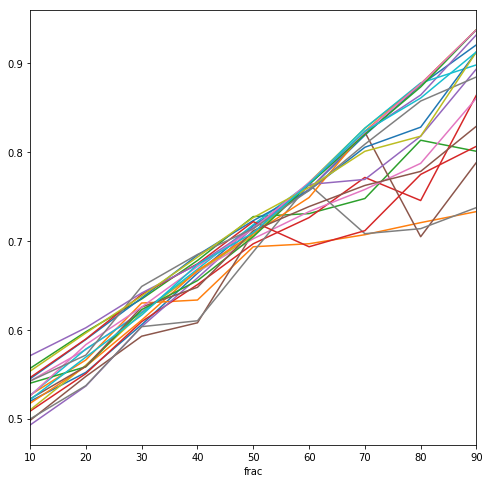

In [58]:
table.T.plot(legend=False, figsize=(8,8))